In [2]:
import cv2
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from keras import layers, Input, models, optimizers
from keras.models import Model, Sequential
from keras.layers import MaxPooling2D, Conv2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

## 저장된 모델 불러오기

In [3]:
from keras.models import load_model

model = load_model('./model/pattern_no_camo_정확도76.h5') # 불러올 모델 이름

## compile 및 데이터 불러오기

In [6]:
# Compiling the CNN

from keras.optimizers import Adam
optimizer = Adam(lr=0.001)

model.compile(optimizer = optimizer, 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])


# 데이터 셋
train_datagen = ImageDataGenerator(rescale=1./255,
#                                    rotation_range=10,
#                                    width_shift_range=0.2,
#                                    height_shift_range=0.2,
#                                    shear_range=0.7,
#                                    zoom_range=[0.9, 2.2],
#                                    horizontal_flip=True,
#                                    vertical_flip=True,
#                                    fill_mode='nearest',
                                   validation_split=0.33)
 
training_set = train_datagen.flow_from_directory('C:/python_DA/파이널프로젝트/img/pattern_수정',
                                                 target_size = (150,150),
                                                 batch_size = 10,
                                                 class_mode = 'categorical',
                                                 subset="training"
#                                                 ,color_mode='grayscale'            # gray_scale로 변경
                                                )
validation_set = train_datagen.flow_from_directory('C:/python_DA/파이널프로젝트/img/pattern_수정',
                                                 target_size = (150,150),
                                                 batch_size = 10,
                                                 class_mode = 'categorical',
                                                 subset="validation"
#                                                 ,color_mode='grayscale'           # gray_scale로 변경
                                                  )

var = list(training_set.class_indices.keys())   # y classes에 해당되는 값
print(var)

Found 5163 images belonging to 8 classes.
Found 2538 images belonging to 8 classes.
['check', 'dot', 'floral', 'graphic', 'leopard', 'none', 'stripe', 'tribal']


## 모델 학습

In [9]:
hist = model.fit_generator(training_set,
                           steps_per_epoch = 15, #20
                           epochs = 100,
                           validation_data = validation_set)
 

Epoch 1/100
15/15 [==============================] - 42s 3s/step - loss: 0.0453 - acc: 0.9867 - val_loss: 1.2410 - val_acc: 0.7088
Epoch 2/100
15/15 [==============================] - 42s 3s/step - loss: 0.0628 - acc: 0.9800 - val_loss: 1.1564 - val_acc: 0.7226
Epoch 3/100
15/15 [==============================] - 42s 3s/step - loss: 0.0624 - acc: 0.9867 - val_loss: 1.0819 - val_acc: 0.7325
Epoch 4/100
15/15 [==============================] - 41s 3s/step - loss: 0.0954 - acc: 0.9733 - val_loss: 1.3106 - val_acc: 0.6998
Epoch 5/100
15/15 [==============================] - 42s 3s/step - loss: 0.0570 - acc: 0.9800 - val_loss: 1.1657 - val_acc: 0.7380
Epoch 6/100
15/15 [==============================] - 43s 3s/step - loss: 0.0467 - acc: 0.9867 - val_loss: 1.1742 - val_acc: 0.7277
Epoch 7/100
15/15 [==============================] - 42s 3s/step - loss: 0.1019 - acc: 0.9733 - val_loss: 1.2838 - val_acc: 0.7293
Epoch 8/100
15/15 [==============================] - 44s 3s/step - loss: 0.0940 - a

15/15 [==============================] - 42s 3s/step - loss: 0.1455 - acc: 0.9400 - val_loss: 1.5135 - val_acc: 0.6753
Epoch 64/100
15/15 [==============================] - 42s 3s/step - loss: 0.1400 - acc: 0.9667 - val_loss: 1.5365 - val_acc: 0.6797
Epoch 65/100
15/15 [==============================] - 42s 3s/step - loss: 0.1239 - acc: 0.9533 - val_loss: 1.7172 - val_acc: 0.6643
Epoch 66/100
15/15 [==============================] - 41s 3s/step - loss: 0.2673 - acc: 0.9133 - val_loss: 1.6437 - val_acc: 0.6690
Epoch 67/100
15/15 [==============================] - 43s 3s/step - loss: 0.2410 - acc: 0.9000 - val_loss: 1.5821 - val_acc: 0.6982
Epoch 68/100
15/15 [==============================] - 43s 3s/step - loss: 0.1799 - acc: 0.9398 - val_loss: 1.8817 - val_acc: 0.6095
Epoch 69/100
15/15 [==============================] - 42s 3s/step - loss: 0.2310 - acc: 0.9133 - val_loss: 1.4432 - val_acc: 0.6864
Epoch 70/100
15/15 [==============================] - 42s 3s/step - loss: 0.1677 - acc: 0

## 학습 결과 확인: 그래프

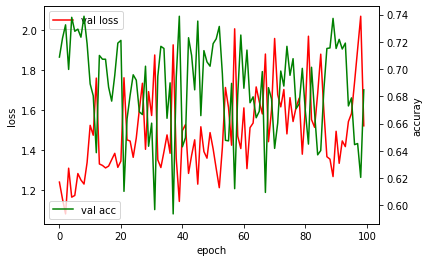

In [10]:
# 학습 과정 정확도, 손실함수 변화 그래프로 보기

import matplotlib.pyplot as plt
 
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
 
#loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
##loss_ax.set_ylim([0.0, 0.5])
 
#acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
##acc_ax.set_ylim([0.8, 1.0])
 
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')
 
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
 
plt.show()

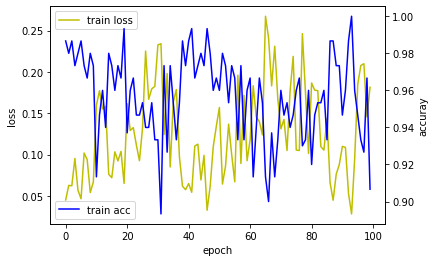

In [11]:
# 학습 과정 정확도, 손실함수 변화 그래프로 보기

import matplotlib.pyplot as plt
 
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
 
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
#loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
##loss_ax.set_ylim([0.0, 0.5])
 
acc_ax.plot(hist.history['acc'], 'b', label='train acc')
#acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
##acc_ax.set_ylim([0.8, 1.0])
 
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')
 
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
 
plt.show()

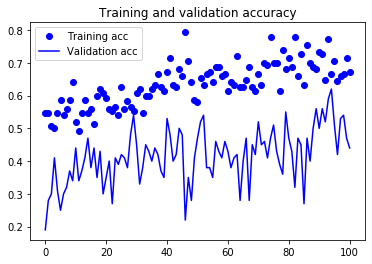

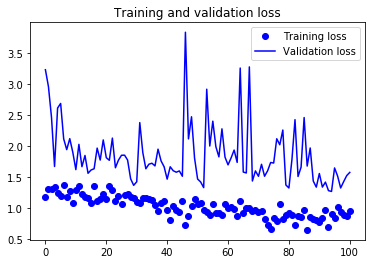

In [15]:
# 다른 방식으로 나타낸 그래프

acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## 학습 결과 확인: 정확도 및 예측

In [8]:
# output = classifier.predict_generator(test_set, steps=5)
# print(test_set.class_indices)
# print(output)
 
# 모델 평가하기
print("-- Evaluate : training acc --") 
train_scores = model.evaluate_generator(
               training_set,
               steps = 10) 
print("%s: %.2f%%" %(model.metrics_names[1], train_scores[1]*100))
print('\n')


print("-- Evaluate : validation acc --") 
vali_scores = model.evaluate_generator(
            validation_set,
            steps = 10) 
print("%s: %.2f%%" %(model.metrics_names[1], vali_scores[1]*100))
 
    
    
# 모델 예측하기
# print("-- Predict --")
 
# output = model.predict_generator(
#             validation_set,
#             steps = 100)
# print(validation_set.class_indices)
# np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
# print(output) 

-- Evaluate : training acc --
acc: 89.00%


-- Evaluate : validation acc --
acc: 69.00%


## 모델 저장

In [ ]:
hist = model.fit_generator(training_set,
                         steps_per_epoch = 15, #20
                         epochs = 1000,  #1000
                         validation_data = validation_set,
                         validation_steps = 10,
                         callbacks=[es,mc])
 

In [ ]:
import json
import pprint

model_json = model.to_json()
pprint.pprint(json.loads(model_json))

In [ ]:
img = Image.open('C:/python_DA/img/test/026.jpg')  # 불러올 이미지 경로
plt.imshow(img)

img = img.resize((150,150))
data = np.array(img)
data = data.astype('float')
data = data/255
data = data.reshape((1,150,150,3))               # RGB, Gray에 따라서 shape의 depth 설정


#result = np.argmax(data)

var = list(training_set.class_indices.keys())   # y에 해당되는 값
print(var)

result = model.predict_classes(data)[0]
print(result)

print('--이 사진의 pattern 값--')
print(var[result])

